# 
<div align="center", style="font-size:300%">
                <font color="#EA1515">
                    <b>  BLACK FRIDAY SALES PREDICTION

---
---


## EVALUATION CRITERIA :
---

- root mean squared error (RMSE)

## DATA DESCRIPTION :
---

- User_ID
- Product_ID
- Gender	
- Age	
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category_1
- Product_Category_2
- Product_Category_3
- Purchase   ( TARGET )

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b>  IMPORTING BASIC LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b>  IMPORTING THE FILES AND RUNNING THE HEAD

In [127]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
sub   = pd.read_csv("submission.csv")
df    = pd.concat((train,test),ignore_index=True)
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> RUNNING THE INFO AND CHECKING SHAPE

In [3]:
print(df.info(),'\n',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB
None 
 (783667

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> RUNNING FIVE POINT SUMMARY

In [4]:
df.describe(include='all').T

count unique        top    freq  \
User_ID                     783667.0    NaN        NaN     NaN   
Product_ID                    783667   3677  P00265242    2709   
Gender                        783667      2          M  590031   
Age                           783667      7      26-35  313015   
Occupation                  783667.0    NaN        NaN     NaN   
City_Category                 783667      3          B  329739   
Stay_In_Current_City_Years    783667      5          1  276425   
Marital_Status              783667.0    NaN        NaN     NaN   
Product_Category_1          783667.0    NaN        NaN     NaN   
Product_Category_2          537685.0    NaN        NaN     NaN   
Product_Category_3          237858.0    NaN        NaN     NaN   
Purchase                    550068.0    NaN        NaN     NaN   

                                      mean          std        min        25%  \
User_ID                     1003028.995753  1727.266668  1000001.0  1001519.0   
Product_ID                             NaN          NaN        NaN        NaN   
Gender                                 NaN          NaN        NaN        NaN   
Age                                    NaN          NaN        NaN        NaN   
Occupation                          8.0793     6.522206        0.0        2.0   
City_Category                          NaN          NaN        NaN        NaN   
Stay_In_Current_City_Years             NaN          NaN        NaN        NaN   
Marital_Status                    0.409777     0.491793        0.0        0.0   
Product_Category_1                5.366196      3.87816        1.0        1.0   
Product_Category_2                9.844506     5.089093        2.0        5.0   
Product_Category_3               12.668605      4.12551        3.0        9.0   
Purchase                       9263.968713  5023.065394       12.0     5823.0   

                                  50%        75%        max  
User_ID                     1003075.0  1004478.0  1006040.0  
Product_ID                        NaN        NaN        NaN  
Gender                            NaN        NaN        NaN  
Age                               NaN        NaN        NaN  
Occupation                        7.0       14.0       20.0  
City_Category                     NaN        NaN        NaN  
Stay_In_Current_City_Years        NaN        NaN        NaN  
Marital_Status                    0.0        1.0        1.0  
Product_Category_1                5.0        8.0       20.0  
Product_Category_2                9.0       15.0       18.0  
Product_Category_3               14.0       16.0       18.0  
Purchase                       8047.0    12054.0    23961.0

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> TARGET VARIABLE

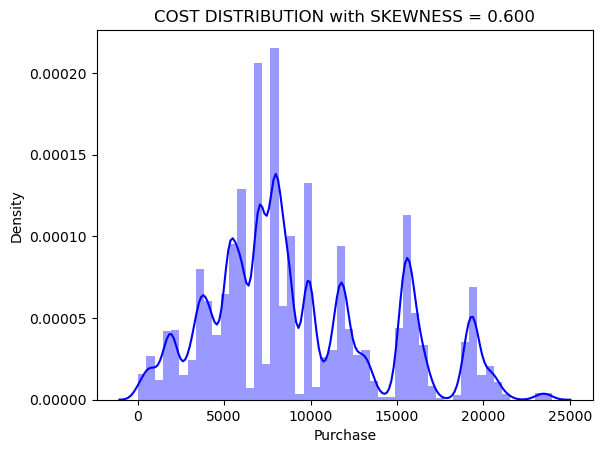

In [6]:
sns.distplot(df.Purchase,color='blue')
plt.title('COST DISTRIBUTION with SKEWNESS = %.3f'%(df.Purchase.skew()))
plt.show()

# MULTI MODAL DISTRIBUTION

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> CHECKING PERCENTAGE OF CATEGORIES IN CATEGORICAL COLUMN

In [7]:
num_cols = df.select_dtypes(np.number).columns.to_list()
cat_cols = df.select_dtypes(object).columns.to_list()

In [8]:
for i in cat_cols:
    print(i,' ----------> ',df[i].nunique())

# INITIALLY THERE ARE NO CATEGORICAL DATA TYPE COLUMNS

Product_ID  ---------->  3677
Gender  ---------->  2
Age  ---------->  7
City_Category  ---------->  3
Stay_In_Current_City_Years  ---------->  5


##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> UNIVARIATE ANALYSIS

---

In [11]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [12]:
plt.figure(figsize=(30,14),dpi=600)
j = 1
for i in num_cols+cat_cols:
    if i not in ['Purchase','Product_ID']:
        plt.subplot(5,2,j)
        if i in num_cols:
            sns.distplot(df[i],color='blue')
            plt.title('SKEWNESS = %.3f'%(df[i].skew()))
        else:
            sns.countplot(df[i],palette=['blue','purple','violet','indigo'])
        j+=1
plt.tight_layout()
plt.show()

##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> BIVARIATE ANALYSIS

---

In [45]:
plt.figure(figsize=(30,14),dpi=600)
j = 1
for i in num_cols+cat_cols:
    if i not in ['Purchase','User_ID','Product_ID']:
        plt.subplot(3,3,j)
        sns.boxplot(df[i],df.Purchase,palette=['blue','purple'])
        j+=1
plt.tight_layout()
plt.show()

In [46]:
# AS PER THE VISUAL ANALYSIS WE CAN SAY THAT ALL THE FEATURES ARE CATEGORICAL IN NATURE EXCEPT FOR THE TARGET
# THAT IS PURCHASE.

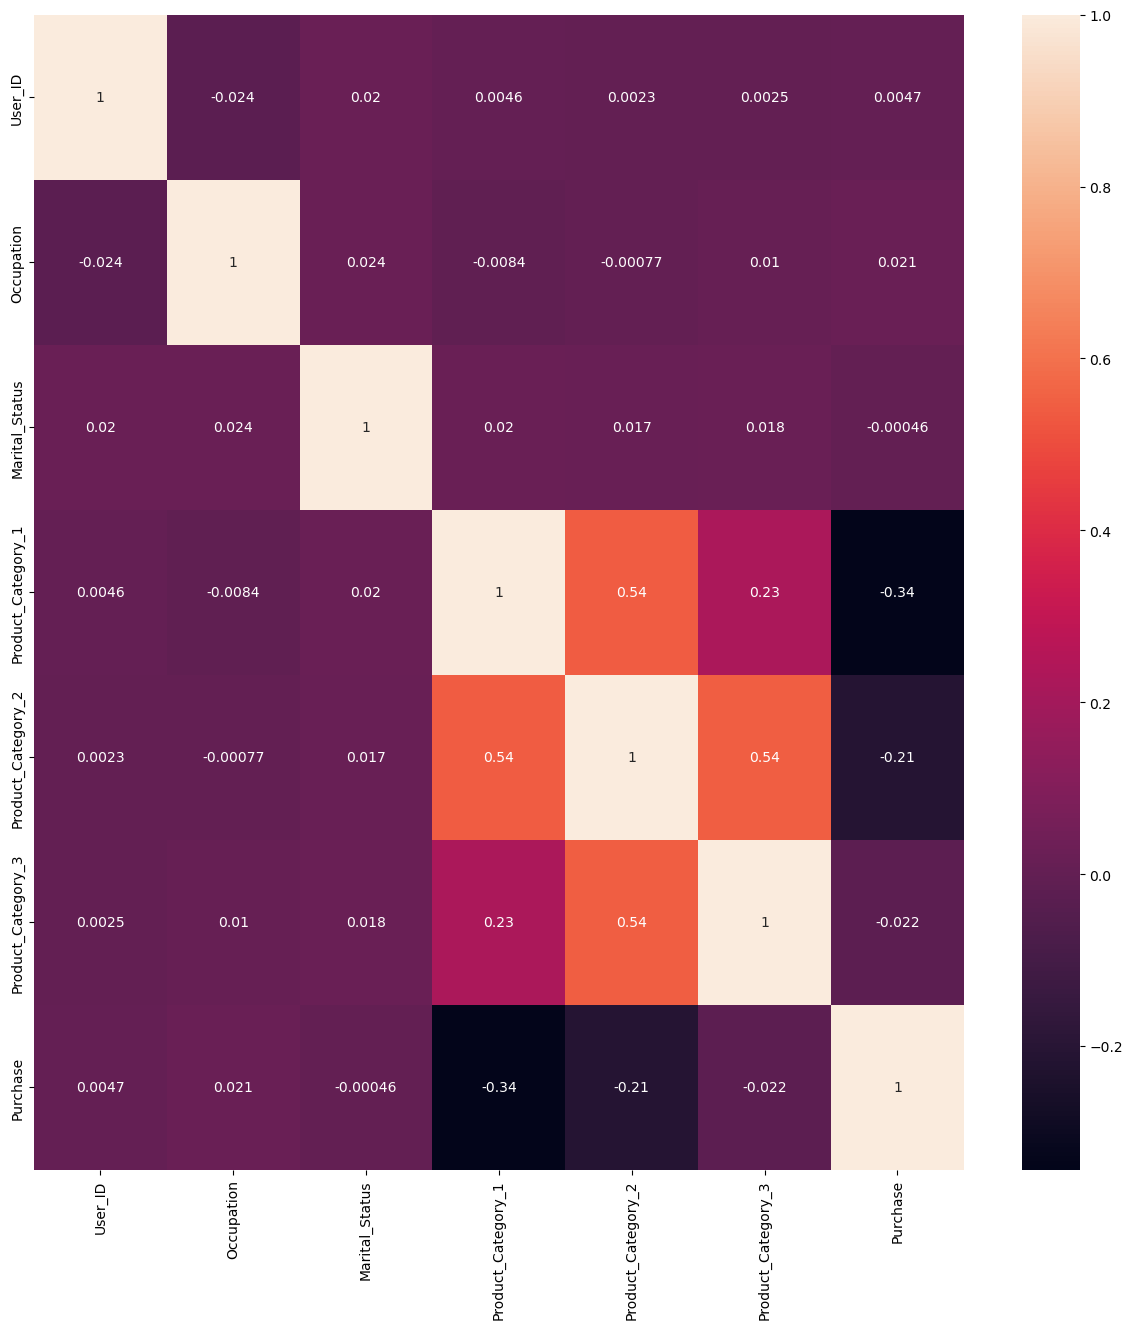

In [47]:
# MULTIVARIATE ANALYSIS

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> AS PER THE VISUAL ANALYSIS


### Vizual analysis summary

• The target column cost is uniformally distributed and is multimodal.

• salad_bar, prepared_food appear to have same relation with cost so we will drop one of them from further analysis

• recyclable package doesn't appear to have a strong relation with the target so we will verify it statistically

• stores having area aroud 30000 square feet appear to have more dense scatters meaning more footfalls.

##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> MISSING VALUES

---

In [132]:
print(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])

Purchase    0.298085
dtype: float64


In [129]:
# Since product category 3 has 69 percent missing values so we will drop it.

del df['Product_Category_3']

In [130]:
# Treating missing values in product category 2

In [131]:
df.Product_Category_2.fillna(df.Product_Category_2.mode()[0],inplace=True)

##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> FEATURE ENGINEERING AND FEATURE MANIPULATION

---

In [133]:
df.drop(columns = ['Product_ID','User_ID'],inplace=True)

In [134]:
for i in df:
    print(i,df[i].nunique())

Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 20
Product_Category_2 17
Purchase 18105


##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> STATISTICAL ANALYSIS

---

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> APPLYING TESTS

In [135]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 
li = []
for i in df:
    if i !='Purchase':
        model = ols('Purchase~%s'%(i),data=df).fit()
        if round(anova_lm(model).iloc[0,4],3)<0.05:
            li.append(i)
print('Significant Columns :\n',li)

Significant Columns :
 ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2']


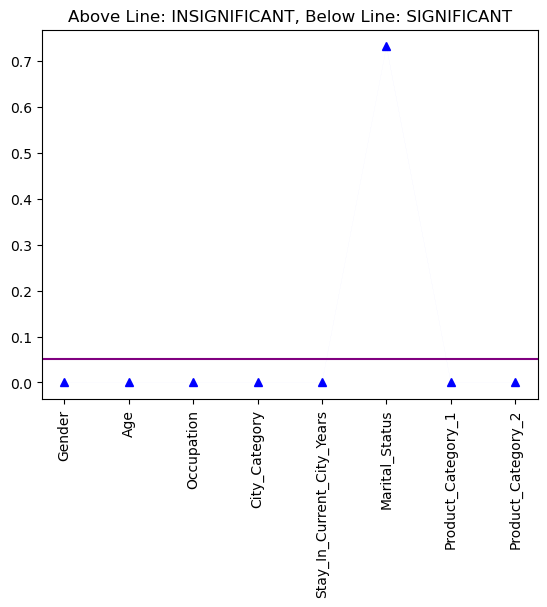

In [136]:
p = []
for i in df:
    if i !='Purchase':
        model = ols('Purchase~%s'%(i),data=df).fit()
        p.append(round(anova_lm(model).iloc[0,4],3))
plt.plot(df.columns[:-1],p,color='blue',marker='^',lw=0.01)
plt.xticks(rotation=90)
plt.title('Above Line: INSIGNIFICANT, Below Line: SIGNIFICANT')
plt.axhline(y=0.05,color='purple')
plt.show()

In [137]:
# Dropping insignificant columns

df = df.loc[:,li+['Purchase']]

##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> DATA PREPROCESSING

---

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> SPLITTING THE DATA INTO TRAIN AND TEST

In [150]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.select_dtypes('O'):
    df[i] = le.fit_transform(df[i])

In [151]:
train = df[df.Purchase.notnull()]
test  = df[df.Purchase.isnull()].drop('Purchase',axis=1)
X = train.drop('Purchase',axis=1)
y = train.Purchase

##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> MODELLING

---

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> IMPORTING THE LIBRARIES AND FUNCTIONS

In [156]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,KFold

##### 
<div align="left", style="font-size:140%">
                <font color="#151EDA">
                    <b> CROSS VALIDATING THE MODELS USING STRATIFIED KFOLD CROSS VALIDATION AND EVALUATING

In [153]:
# CREATING MACHINE INSTANCE

lr  = LinearRegression()
rg  = Ridge()
la = Lasso()
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor()
xg  = XGBRegressor()
ca  = CatBoostRegressor(verbose=0)
ad  = AdaBoostRegressor()
gb  = GradientBoostingRegressor()
lg  = LGBMRegressor()
knn = KNeighborsRegressor(n_neighbors=3)

In [157]:
cv = KFold(n_splits=5,shuffle=True)

for m in [lr,rg,la,dt,xg,ca,ad,gb,lg,knn]:
    print('\t\t',m,'\n')
    for i,j in cv.split(X,y):
        xtr,xte,ytr,yte = X.loc[i],X.loc[j],y[i],y[j]
        model = m.fit(xtr,ytr)
        pred_tr,pred_te = model.predict(xtr),model.predict(xte)
        print(round(r2_score(ytr,pred_tr),4),' , ',round(r2_score(yte,pred_te),4))
        print(round(np.sqrt(mean_squared_error(ytr,pred_tr)),4),' , ',round(np.sqrt(mean_squared_error(yte,pred_te)),4))
    print('\n')

		 LinearRegression() 

0.1246  ,  0.1298
4701.8221  ,  4677.8332
0.1273  ,  0.1189
4692.7912  ,  4714.0033
0.126  ,  0.1242
4696.2424  ,  4700.1809
0.1255  ,  0.1262
4695.3959  ,  4703.5872
0.1248  ,  0.1287
4698.788  ,  4689.9801


		 Ridge() 

0.1253  ,  0.1266
4694.1693  ,  4708.4619
0.1263  ,  0.123
4693.8023  ,  4709.8914
0.125  ,  0.1282
4699.6376  ,  4686.5545
0.1252  ,  0.127
4699.952  ,  4685.3431
0.1262  ,  0.1232
4697.5065  ,  4695.1143


		 Lasso() 

0.1256  ,  0.1257
4700.4266  ,  4683.4059
0.1248  ,  0.1287
4701.5114  ,  4679.0927
0.1257  ,  0.125
4694.6567  ,  4706.5134
0.1258  ,  0.1249
4695.2115  ,  4704.2929
0.1261  ,  0.1236
4693.2589  ,  4712.0731


		 DecisionTreeRegressor() 

0.7259  ,  0.6156
2631.2578  ,  3107.1512
0.7247  ,  0.6201
2635.8418  ,  3095.3805
0.7252  ,  0.6193
2631.0539  ,  3109.028
0.7258  ,  0.6154
2630.7973  ,  3111.7046
0.7254  ,  0.6185
2631.8707  ,  3103.3392


		 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsa

In [26]:
# BASE PERFORMANCE WAS COMING BEST WITH XGBOOST REGRESSOR SO WE WILL USE IT AS OUR FINAL MODEL.
# (Tuning is crashing the system)

In [158]:
# FINAL MODEL

model = xg.fit(X,y)

In [160]:
sub['Purchase'] = model.predict(test)
sub.to_csv('xgboost.csv',index=False)

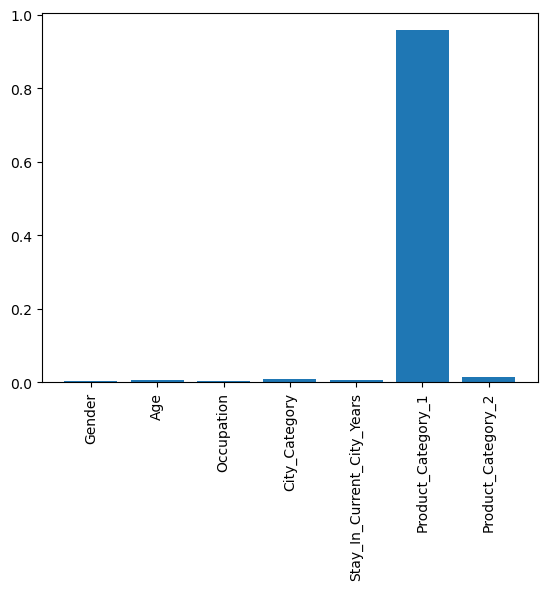

In [161]:
plt.bar(X.columns,xg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [162]:
# As per the model, most of importance is given to Product_Category_2